#  TASK 1
## Boston Dataset Features
- `CRIM`: Per capita crime rate by town
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: Proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`: Nitric oxides concentration (parts per 10 million)
- `RM`: Average number of rooms per dwelling
- `AGE`: Proportion of owner-occupied units built prior to 1940
- `DIS`: Weighted distances to five Boston employment centres
- `RAD`: Index of accessibility to radial highways
- `TAX`: Full-value property-tax rate per $10,000
- `PTRATIO`: Pupil-teacher ratio by town
- ~~`B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town~~
- `LSTAT`: Percentage of lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000's


In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
InteractiveShell.ast_node_interactivity = "all"

boston_df = None

with open("housing.csv", "r") as f:
    names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                         "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
    boston_df = pd.read_csv(f, header=None, index_col=False, names=names, sep=r'\s+') # Space separated csv

boston_df = boston_df.drop(["B"], axis=1) # Remove unethical data
#Check missing data
print(boston_df[boston_df.eq('?').any(1)])

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, MEDV]
Index: []


C:\Users\rsaif\AppData\Local\Temp\ipykernel_38708\1312194477.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(boston_df[boston_df.eq('?').any(1)])


In [2]:
boston_df.describe()
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


## Wine Dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
wine_X = wine.data.features
wine_y = wine.data.targets
  
print(wine_X[wine_X.eq('?').any(1)])
print(wine_y[wine_y.eq('?').any(1)])

Empty DataFrame
Columns: [Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline]
Index: []
Empty DataFrame
Columns: [class]
Index: []


C:\Users\rsaif\AppData\Local\Temp\ipykernel_38708\1423119728.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(wine_X[wine_X.eq('?').any(1)])
C:\Users\rsaif\AppData\Local\Temp\ipykernel_38708\1423119728.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(wine_y[wine_y.eq('?').any(1)])


In [4]:
wine_data = wine_X.join(wine_y)
wine_data.describe()
wine_data.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [5]:
wine_X = wine_X.to_numpy()
wine_y = wine_y.to_numpy()

# TASK 2
Linear Regression and Logistic Regression models are found in the accompanying .py files


# TASK 3
## Training Boston Dataset

First, we divide the dataset into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
boston_np = boston_df.to_numpy()
boston_X = boston_np[:, :-1]
boston_y = boston_np[:, -1]
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, shuffle=True)

We then initialize and train linear regression models

In [7]:
from linear_regression import LinearRegression
from linear_regression_sgd import LinearRegressionSGD

linear_reg_model = LinearRegression(boston_X.shape[1])
linear_sgd_model = LinearRegressionSGD(boston_X.shape[1])
linear_reg_model.fit(X_train, y_train)
linear_sgd_model.fit(X_train, y_train)
analytical_mse = linear_reg_model.compute_error(X_test, y_test)
sgd_mse = linear_sgd_model.compute_error(X_test, y_test)
analytical_mse
sgd_mse


6.875764930562717

69.50462565474795

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Boston Dataset Error with SGD')

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

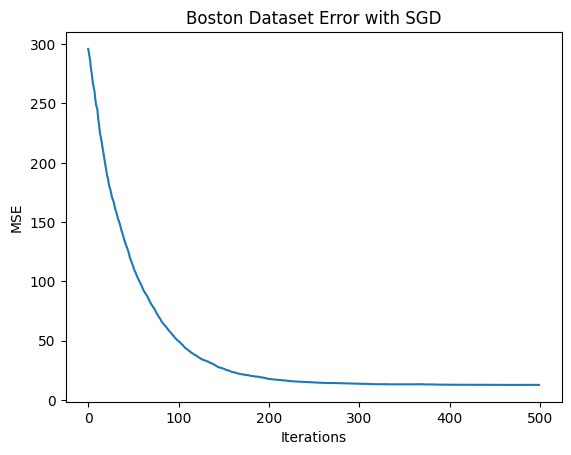

In [8]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(linear_sgd_model.error_array[:500])
plt.title("Boston Dataset Error with SGD")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [9]:
analytical_y_hat = linear_reg_model.predict(X_test)
sgd_y_hat = linear_sgd_model.predict(X_test)
y_test_comp = np.column_stack((y_test, analytical_y_hat, sgd_y_hat))
test_y_df = pd.DataFrame(y_test_comp, columns=["True y", "Analyitical y_hat", "SGD y hat"])
test_y_df

,True y,Analyitical y_hat,SGD y hat
0,30.1,24.961698,24.819869
1,18.8,20.048604,20.193430
2,10.4,8.399971,8.409759
3,50.0,42.194812,41.935607
4,21.7,22.429754,22.839151
...,...,...,...
97,24.6,24.634318,24.335783
98,35.4,30.735779,30.467600
99,22.6,18.428874,18.889565
100,17.2,19.262553,19.286976


## Training Wine Dataset With Logistic Regression

Again, we start by separating the data into 80/20 train-test sets

In [10]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, shuffle=True)

In [11]:
from logistic_regression import LogisticRegression
from logistic_regression_sgd import LogisticRegressionSGD

logistic_reg_model = LogisticRegression(wine_X.shape[1], 3)
logistic_sgd_model = LogisticRegressionSGD(wine_X.shape[1], 3)

logistic_reg_model.fit(wine_X_train, wine_y_train)
logistic_sgd_model.fit(wine_X_train, wine_y_train)

logistic_reg_f1 = logistic_reg_model.compute_F1(wine_X_test, wine_y_test)
logistic_sgd_f1 = logistic_sgd_model.compute_F1(wine_X_test, wine_y_test)

logistic_reg_f1
logistic_sgd_f1


array([[0.87499999],
       [0.91428571],
       [0.95238095]])

array([[0.99999999],
       [0.97297297],
       [0.95238095]])

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'F1 scores with vanilla GD')

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'F1 score')

(0.0, 1.0)

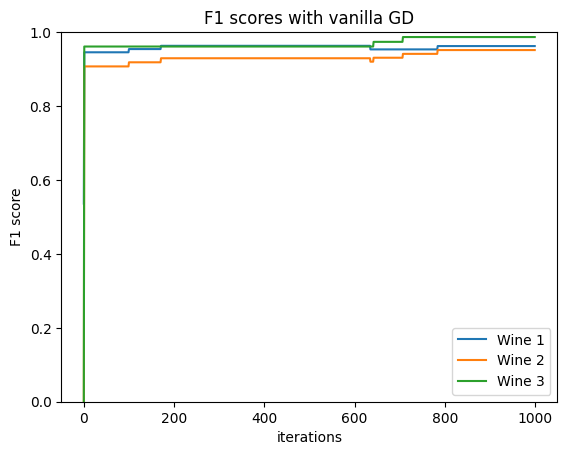

In [12]:

plt.figure()
for i in range(3):
    plt.plot(logistic_reg_model.f1_list[i, :], label=f"Wine {i+1}")
plt.legend()
plt.title("F1 scores with vanilla GD")
plt.xlabel("iterations")
plt.ylabel("F1 score")
plt.ylim((0, 1))

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

Text(0.5, 1.0, 'F1 scores with SGD')

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'F1 score')

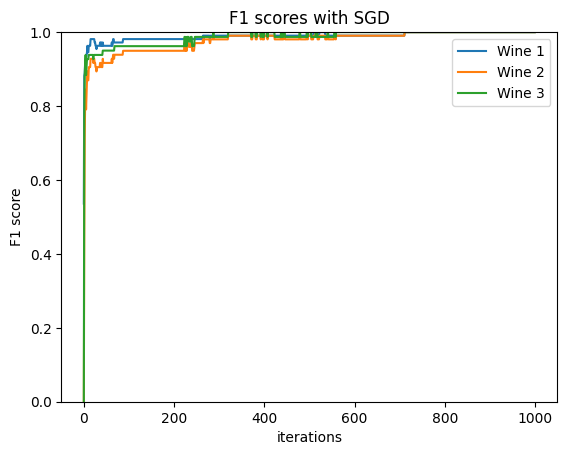

In [13]:
plt.figure()
plt.ylim((0, 1))
for i in range(3):
    plt.plot(logistic_sgd_model.f1_list[i, :], label=f"Wine {i+1}")
plt.legend()
plt.title("F1 scores with SGD")
plt.xlabel("iterations")
plt.ylabel("F1 score")

## Five-Fold Cross Validation
We start by first dividing each of our datasets into 5 parts as evenly as we can

In [14]:
boston_indices = np.arange(boston_y.size)
wine_indices = np.arange(wine_y.size)

# Shuffle data
np.random.shuffle(boston_indices)
np.random.shuffle(wine_indices)
b1, b2, b3, b4, b5 = np.array_split(boston_indices, 5)
w1, w2, w3, w4, w5 = np.array_split(wine_indices, 5)
boston_list = [b1, b2, b3, b4, b5]
wine_list = [w1, w2, w3, w4, w5]

We first do 5-fold cross validation with analytical linear regression

In [15]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_reg_model.fit(X_train, y_train)
    linear_reg_model.compute_error(X_test, y_test)
    

12.310641607442273

9.0222786245032

11.975883755523295

11.007018171404027

15.336585028649614

We then move to linear regression with SGD

In [16]:
for i in range(len(boston_list)):
    test_indices = boston_list[i]
    X_test = boston_X[test_indices, :]
    y_test = boston_y[test_indices]
    X_train = np.delete(boston_X, test_indices, axis=0)
    y_train = np.delete(boston_y, test_indices)
    linear_sgd_model.fit(X_train, y_train)
    linear_sgd_model.compute_error(X_test, y_test)

71.41584810249425

79.38703560204321

79.50823510443543

61.3696787488115

76.26575215341623

Next, we will do the same with the Wine data set, first with regular gradient descent

In [17]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_reg_model.fit(X_train, y_train)
    logistic_reg_model.compute_F1(X_test, y_test)

array([[0.92307692],
       [0.96551724],
       [0.99999999]])

array([[0.99999999],
       [0.96551724],
       [0.9090909 ]])

array([[0.96551724],
       [0.92307692],
       [0.94117646]])

array([[0.9090909 ],
       [0.89655172],
       [0.94736842]])

array([[0.86956521],
       [0.88888888],
       [0.99999999]])

Finally, we repeat this for Logistic Regression with SGD

In [18]:
for i in range(len(wine_list)):
    test_indices = wine_list[i]
    X_test = wine_X[test_indices, :]
    y_test = wine_y[test_indices]
    X_train = np.delete(wine_X, test_indices, axis=0)
    y_train = np.delete(wine_y, test_indices)
    logistic_sgd_model.fit(X_train, y_train)
    logistic_sgd_model.compute_F1(X_test, y_test)

array([[0.92307692],
       [0.96551724],
       [0.99999999]])

array([[0.99999999],
       [0.96551724],
       [0.9090909 ]])

array([[0.99999999],
       [0.91666666],
       [0.88888888]])

array([[0.99999999],
       [0.99999999],
       [0.99999999]])

array([[0.99999999],
       [0.99999999],
       [0.99999999]])

## Sampling with Different Training Data Sizes
We first start with the Boston set with anaytical linear regression

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'MSE')

Text(0.5, 0, 'Training Size')

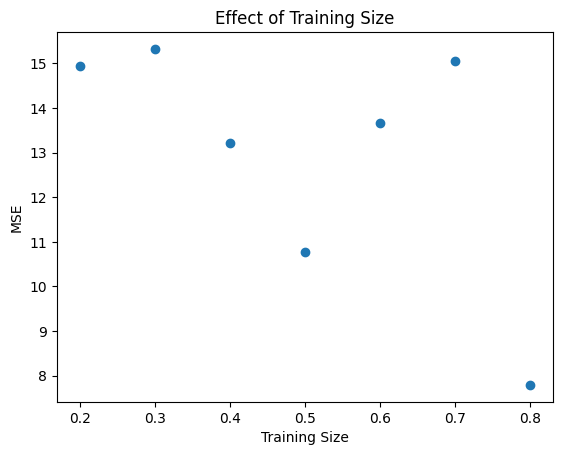

In [19]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], shuffle=True)
    linear_reg_model.fit(X_train, y_train)
    mse = linear_reg_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We repeat this for linear regression with SGD

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'MSE')

Text(0.5, 0, 'Training Size')

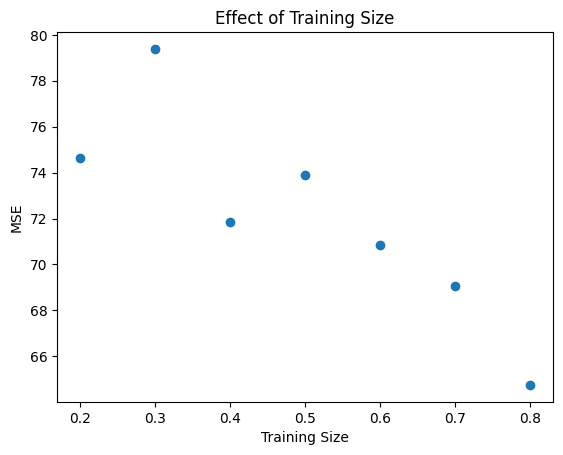

In [20]:
training_sizes = np.arange(0.2, 0.9, 0.1)
mse_list = np.empty(0, )
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, train_size=training_sizes[i], shuffle=True)
    linear_sgd_model.fit(X_train, y_train)
    mse = linear_sgd_model.compute_error(X_test, y_test)
    mse_list = np.append(mse_list, mse)
plt.scatter(training_sizes, mse_list)
plt.title("Effect of Training Size")
plt.ylabel("MSE")
plt.xlabel("Training Size")

We now analyze this relation with the Wine dataset and vanilla GD

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'F1 Score')

Text(0.5, 0, 'Training Size')

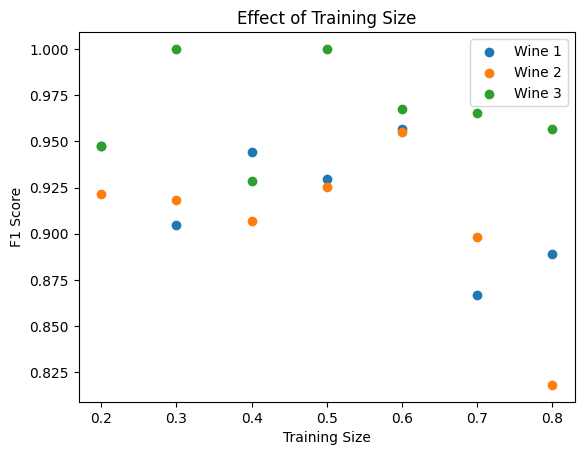

In [21]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], shuffle=True)
    logistic_reg_model.fit(X_train, y_train)
    f1 = logistic_reg_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()

Finally, we experiment with the same for logistic regression with SGD

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Effect of Training Size')

Text(0, 0.5, 'F1 Score')

Text(0.5, 0, 'Training Size')

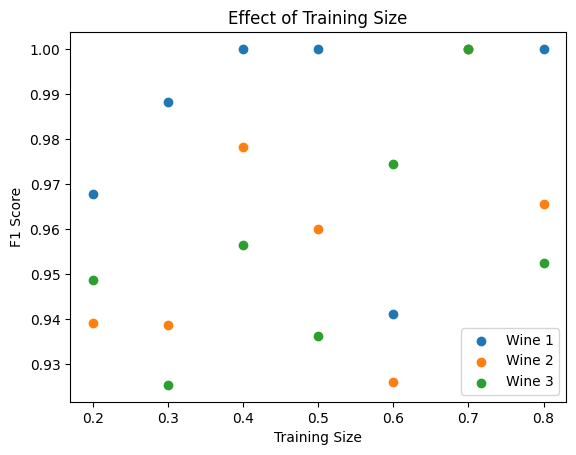

In [22]:
training_sizes = np.arange(0.2, 0.9, 0.1)
f1_list = np.empty((3, 0))
for i in range(training_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, train_size=training_sizes[i], shuffle=True)
    logistic_sgd_model.fit(X_train, y_train)
    f1 = logistic_sgd_model.compute_F1(X_test, y_test)
    f1_list = np.column_stack((f1_list, f1))
plt.figure()
plt.scatter(training_sizes, f1_list[0, :], label="Wine 1")
plt.scatter(training_sizes, f1_list[1, :], label="Wine 2")
plt.scatter(training_sizes, f1_list[2, :], label="Wine 3")
plt.title("Effect of Training Size")
plt.ylabel("F1 Score")
plt.xlabel("Training Size")
plt.legend()

## Effect of Batch Sizes
We want to investigate the effect of growing batch sizes on mini-batch SGD. We start first with the Boston dataset

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Effect of Batch Size')

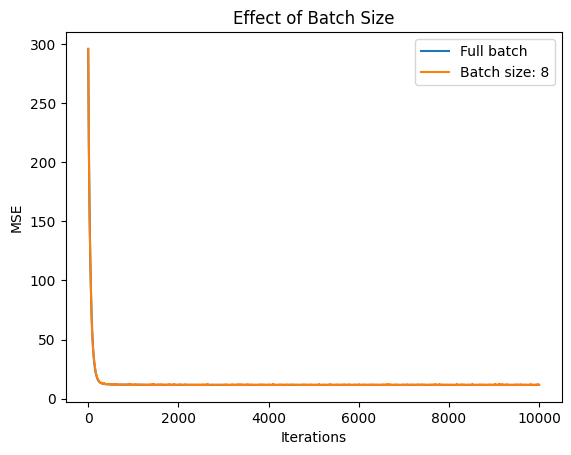

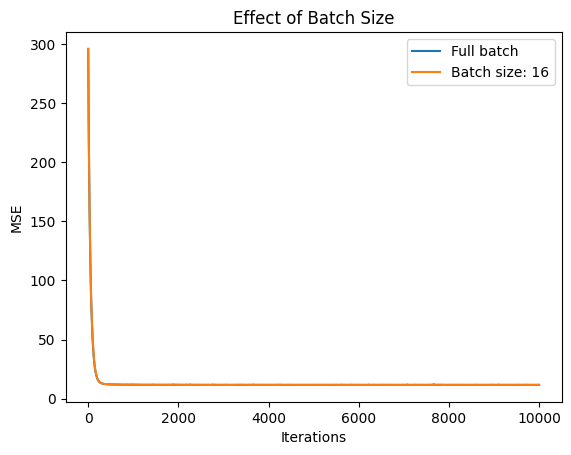

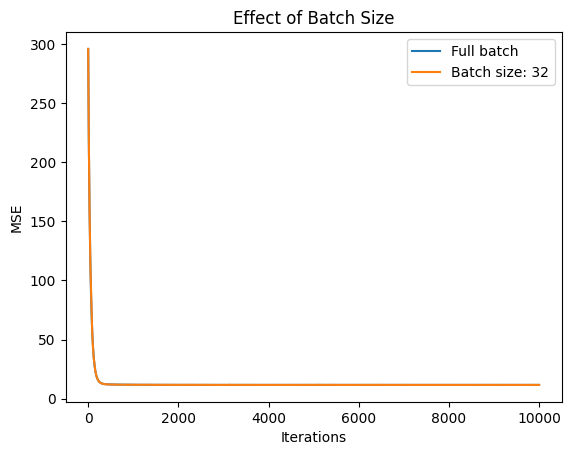

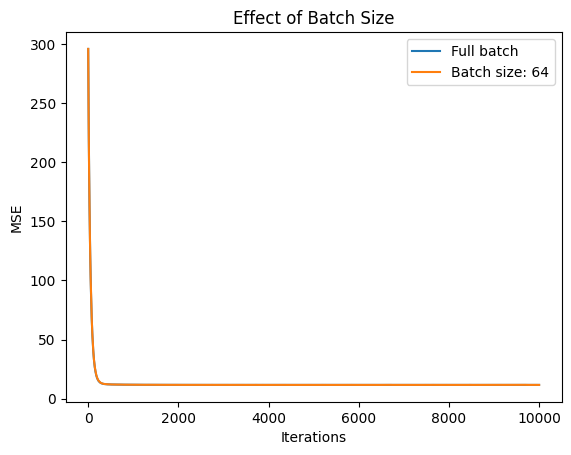

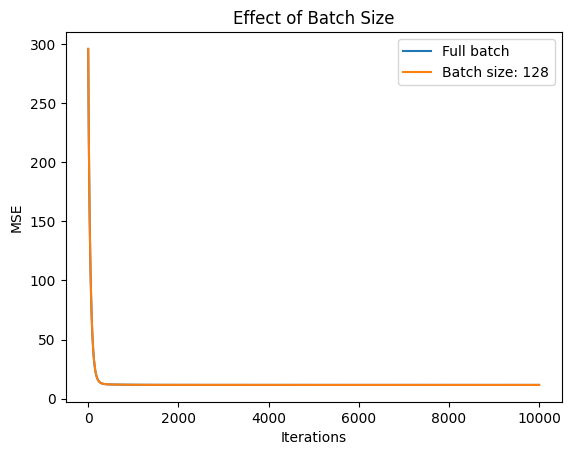

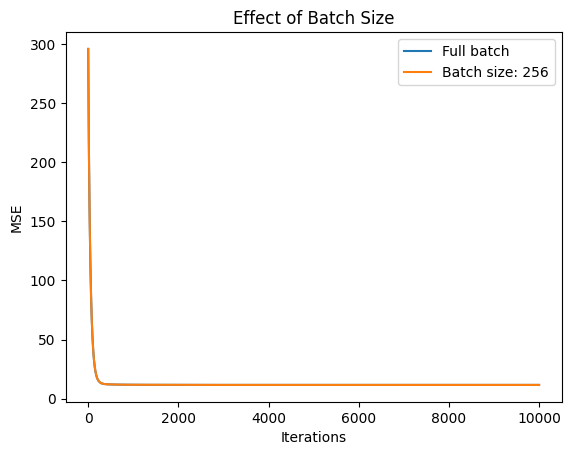

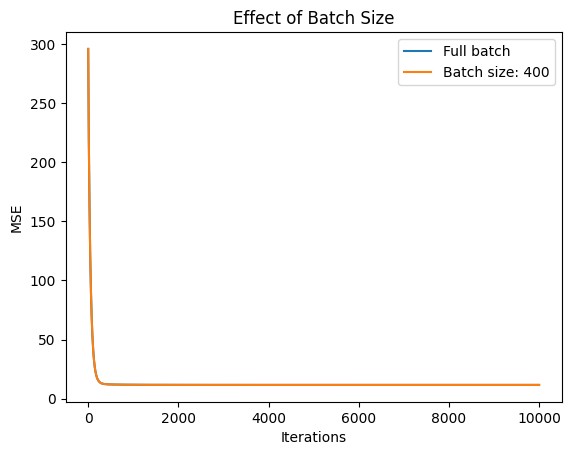

In [23]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2)
linear_sgd_model.fit(X_train, y_train, batch_size=y_train.size)
base_case = linear_sgd_model.error_array
test_batch_sizes = [8, 16, 32, 64, 128, 256, 400]
result_dict = {"Full batch":linear_sgd_model.compute_error(X_test, y_test)}
for size in test_batch_sizes:
    plt.figure()
    linear_sgd_model.fit(X_train, y_train, batch_size=size)
    error_array = linear_sgd_model.error_array
    result_dict[f"Size {size}"] = linear_sgd_model.compute_error(X_test, y_test)
    plt.plot(base_case, label="Full batch")
    plt.plot(error_array, label=f"Batch size: {size}")
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.title("Effect of Batch Size")

In [24]:

result_dict

{'Full batch': 80.28109689129482,
 'Size 8': 82.20749576304091,
 'Size 16': 79.45786033081289,
 'Size 32': 80.88871701832566,
 'Size 64': 79.73608724419145,
 'Size 128': 81.20116470847363,
 'Size 256': 80.32903902881505,
 'Size 400': 80.236141350482}

We investigate the same with the Wine dataset

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Effect of Batch Size 8')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Effect of Batch Size 16')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Effect of Batch Size 32')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Effect of Batch Size 64')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'Effect of Batch Size 128')

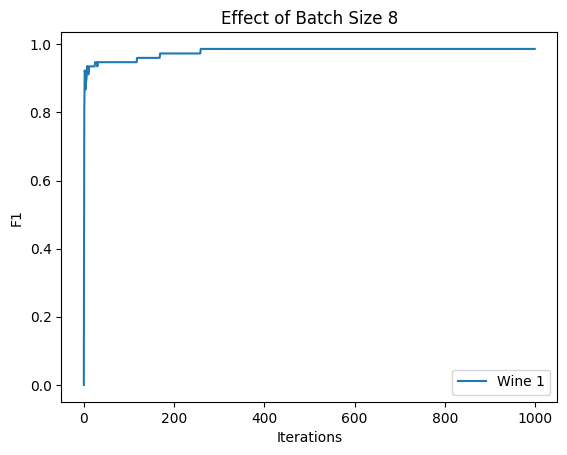

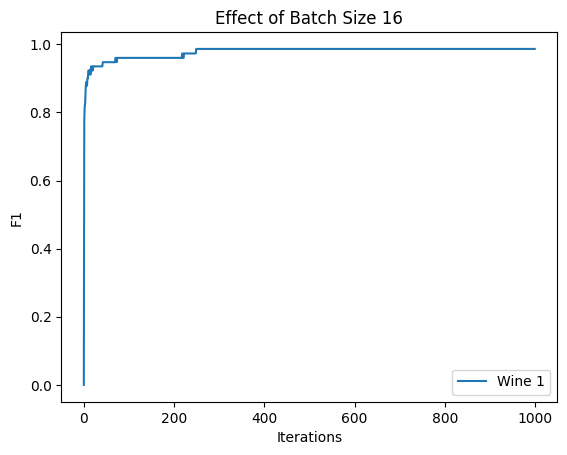

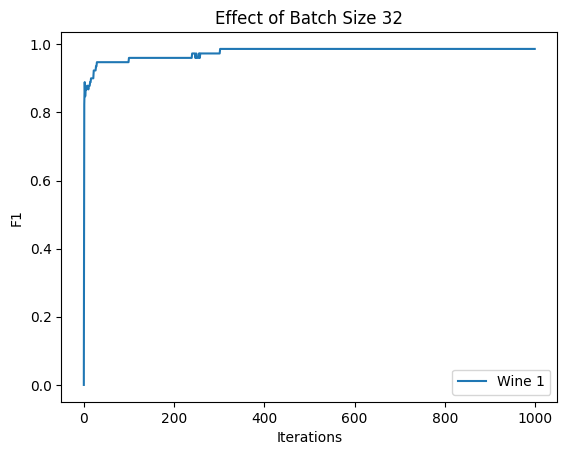

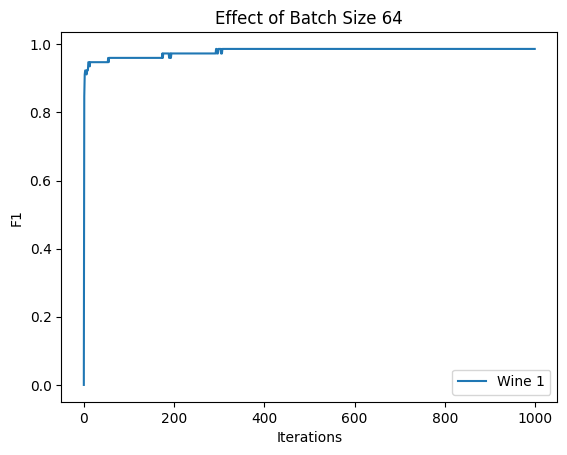

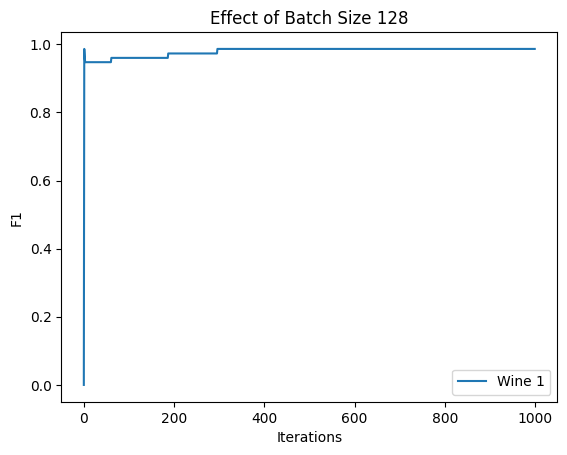

In [25]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.2)
test_batch_sizes = [8, 16, 32, 64, 128]
result_dict = {}
for size in test_batch_sizes:
    plt.figure()
    logistic_sgd_model.fit(X_train, y_train, batch_size=size)
    F1_array = logistic_sgd_model.f1_list
    result_dict[f"Size {size}"] = logistic_sgd_model.compute_F1(X_test, y_test)
    plt.plot(F1_array[2, :], label="Wine 1")
    plt.plot(F1_array[1, :], label="Wine 2")
    plt.plot(F1_array[2, :], label="Wine 3")
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("F1")
    plt.title(f"Effect of Batch Size {size}")